# Transport Canada Analysis - Parsing Sitcen Notification Messages (2020)
### by Jérôme E. Blanchet, Senior Analyst | Data Scientist 

981 Gulf Pl, Ottawa, ON K1K 3X9 (819) 576-5502 
JeromeblanchetAI@gmail.com

  
  
# Abstract

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Table of Contents

Part 1) Data and Modules Importation....................................................................................................XXX  
Part 2) Data Description and Interaction ....................................................................................................XXX
 
Part 3) Preprocessing the Data...............................................................................................XXX  
 
-  3.0 Logarithmic Tranformation 
-  3.1 Dimensionality Reduction with Principal Component Analysis (PCA) Binary Variables Only  
-  3.2 Dimensionality Reduction with T-distributed stochastic neighbor embedding (t-SNE) on top (PCA)  
-  3.3 Dimensionality Reduction with Principal Component Analysis (PCA) Continuous Variables Only  
-  3.4 Dimensionality Reduction with T-distributed stochastic neighbor embedding (t-SNE) on top of (PCA)  
-  3.4 Clustering
-  ...at least 80% of the paper ;-)










In [23]:
# Automation that will run all code once a day at 3:00 am (outside of business hours) & update dataset



# Packages Installation

In [231]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [232]:
pip install  mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [259]:
pip install gmplot

  Created wheel for gmplot: filename=gmplot-1.2.0-py3-none-any.whl size=143767 sha256=f239377ebcf31538b109bca340b2ca0fcb8f4781c0af1ea12a25bbdf90a08e17
  Stored in directory: c:\users\18195\appdata\local\pip\cache\wheels\a1\bb\61\143790d9935e333669dd6aeef38f7aec9b3a1b7007f47d6fe8
Successfully built gmplot
Note: you may need to restart the kernel to use updated packages.


In [361]:
pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-py3-none-any.whl size=15779 sha256=f7f584bfee54b8e38d17a0b6b7e89d6ea27ce6a34ff0f6dfbe06df293b0067d7
  Stored in directory: c:\users\18195\appdata\local\pip\cache\wheels\29\2c\06\957b5a801b311507090697dde39473f3d70154f1ca7142efa8
Successfully built googletrans
Note: you may need to restart the kernel to use updated packages.


# Modules Importation

In [362]:

from __future__ import print_function
from __future__ import division

from datetime import datetime
import os
import re
import sys
import conda
import time
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame

import calendar

#import geopandas as gpd
#from shapely.geometry import Point, Polygon

import gmplot

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
#from mpl_toolkits.basemap import Basemap
from IPython.display import Image

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (GMapPlot, GMapOptions, ColumnDataSource, 
Circle, LogColorMapper, BasicTicker, ColorBar,
DataRange1d, PanTool, WheelZoomTool, BoxSelectTool)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5

from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None)

import os
import re
import warnings
warnings.simplefilter("ignore", UserWarning)
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np 
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk
#Need punkt to make text cleaning def properly working
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score
from sklearn.externals import joblib
import scipy
from scipy.sparse import hstack
import seaborn as sns
from sklearn.metrics import roc_auc_score
sns.set_style("whitegrid")
sns.set_palette("pastel")

#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import KFold 
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import ShuffleSplit
#from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
#from sklearn.grid_search import RandomizedSearchCV
#from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sompy.visualization.mapview import View2D
#from sompy.visualization.umatrix import UMatrixView
#from sompy.visualization.histogram import Hist2d
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.tree import _tree
#from feature import DropInvariant, CombineLevels, SelectFeature, CreateFeature

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('wordnet')

from googletrans import Translator

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from deep_forest import MGCForest
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18195\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18195\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18195\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Modules Version

In [2]:
# python modules version

import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
#import keras
#print('keras: {}'.format(keras.__version__))
#import tensorflow
#print('tensorflow: {}'.format(tensorflow.__version__))

numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


# TODO

##### add French - English translator one word at a time.
##### variable listing notification receiver lonly
##### considering correction notification that actually correct past update or description
##### adding a notification counter if same description (duplicates on notification or title)
##### extracting all outlook notification in a folder .txt files
##### vertical bar chart for better readability
##### eigenvector with variable names in scatter plot
##### adding umap
##### considering more than 1 paragraphe for a section
##### transportation mode and accident/incident legend in world map 
##### try except pass logic for not breaking looping if notification is not matching with code
##### distribution of all numerical variable; time, word count, update number, etc.
##### fixing Number_of_Sentence_in_Notification
##### more testing on date and time capturing (2 date vs 1 date)
##### extracting short description properly in notification file name

# list of assumption

##### The structure of Sitcen notification may change accross time and notification type. 
##### We are assuming as less assumption as possible in the code below.
......

# Setting Folders

In [462]:
# setting up folders
# the current folder is
os.getcwd()

'C:\\Users\\18195\\Downloads\\CITCEN NOTIFICATIONS'

In [463]:
# No matter the current folder name, let's change it to the real one
os.chdir(r'C:\\Users\\18195\\Downloads\\CITCEN NOTIFICATIONS')

In [464]:
# New current folder is
os.getcwd()

'C:\\Users\\18195\\Downloads\\CITCEN NOTIFICATIONS'

In [469]:
#Listing all sitcen notification appending and ready to be integrated in the database.

current = os.getcwd()

for dirname, _, filenames in os.walk(current):
    for filename in filenames:
        print(filename)

(ONT - TDG - UUUU) Correction - Mise-à-jour 44 - Immediate Notification - Derailment with Crude Oil - Emo ON - 18 February 2020.txt
(ONT - TDG - UUUU) Correction - Mise-à-jour 44 - Immediate Notification - Derailment with Crude Oil - Montreal Quebec - 18 February 2026.txt
(ONT - TDG) Correction - Update 12 - Immediate Notification - Derailment with Crude Oil - Calgary Alberta - 18 February 2021.txt
(ONT - TDG) Correction - Update 12 - Immediate Notification - Derailment with Crude Oil - Victoria BC - 18 February 2025.txt
(ONT - TDGY) Correction - ggg - Immediate Notification - Derailment with Crude Oil – Faro Yukon – 18 February 2024.txt
(ONT - TDGY) Correction - ggg - Immediate Notification - Derailment with Crude Oil – Toronto ON – 18 February 2022.txt
(ONT - TDGY) Correction - ggg - Immediate Notification - Derailment with Crude Oil – Toronto ON – 18 fevrier 2027.txt


# Extracting Sitcen Notification from Outlook

In [ ]:
#Extracting all sitcen notification from Outlook

import win32com.client

current = os.getcwd()

outlook = win32com.client.Dispatch('Outlook Application').GetNameSpace('MAPI')
inbox = outlook.GetDefaultFolder(6)
messages = inbox.Items
messages.sort('[ReceivedTime]', True)

lastDayMessages = messages.Restrict('[Sendername]' == 'Sitcen HQ / Centre d\'intervention AC (TC)' AND \  
                '[ReceivedTime]' ........)

for message in lastDayMessages:
    
    print message.ReceivedTime
    print message.sendername.encode('ascii', 'ignore')
    print message.Subject.encode('ascii', ignore)
    #print message.Body.encode('ascii', ignore)
    
    message.Body.saveas('message.Subject' + '.txt', current)


# Automated Translation for French Notifications (French ➜ English)

In [446]:
#---------------------------------------------------------------------------------------------------------------
#step 1, let's translate all words in English

current = os.getcwd()

translator = Translator()

for dirname, _, filenames in os.walk(current):
    for filename in filenames:
                               
        search = re.findall(r'\d\d \w+ \d\d\d\d', filename)
        MM = search[0][:-4][2:]
        
        list_month_in_french = [' janvier ',' février ',' mars ',' avril ',' mai ',' juin ',
                               ' juillet ',' août ',' septembre ',' octobre ',' novembre ',' décembre ']
        
        if MM in list_month_in_french:
            
            with open(filename, 'r') as myfile: 
                data = myfile.read()
                Full_Content = [i.strip().split() for i in data.split('\n\n') if len(i.strip())>0]   
                myfile.close()
            
            list_english = []
            
            for n, sub_list in enumerate(Full_Content):
                translations = translator.translate(sub_list, src='fr', dest='en')
                
                sub_list_english = []
                
                for translation in translations:
                    sub_list_english.append(translation.text)           

                list_english.append(sub_list_english)

        Full_Content = list_english
        
        File_Name = filename.tolist()

        transl = translator.translate(File_Name, src='fr', dest='en')

        list_engli = []
        
        for transla in transl:
            list_engli.append(transla.text) 

        File_Name = list_engli

        File_Name = ' '.join(File_Name)
        
#---------------------------------------------------------------------------------------------------------------
#step 2, let's make sure all section's titles are exactly named as an original English notification












NameError: name 'list_english' is not defined

# Database Building

In [442]:
#Building temporary dataset

start_time = time.clock()

i = 1

current = os.getcwd()

dataset = pd.DataFrame(columns=['Notification_ID',
                                'File_Name',
                                'Status',
                                'Geography', 
                                'Date', 
                                'Year', 
                                'Month',
                                'Day',
                                'Type', 
                                'Longitude', 
                                'Latitude', 
                                'Short_Description',
                                'Full_Content',
                                'Long_Description',
                                'Source_of_Reporting',
                                'Current_Transport_Canada_Actions',
                                'Current_Actions_other',
                                'Notification_provided_to',
                                'Next_Steps',
                                'Initial_analysis',
                                'Number_of_Update_Displayed',
                                'Update_Number',
                                'Current_Update',
                                'Notification',
                                'Number_of_Word_in_Notification',
                                'Number_of_Paragraphe_in_Notification',
                                'Number_of_Character_in_Notification',
                                'Number_of_Sentence_in_Notification',
                                'Full_Date_Original',
                                'Full_Date_Update',
                                'Full_Time_Original',
                                'Full_Time_Update',
                                'Intervalle_Update_Original',
                                'Accident_Flag'])

File_Name = ''
Notification_ID = ''
Geography = '' 
Status = ''
Date = ''
Year = ''
Month = ''
Day = ''
Type = ''
Longitude = ''
Latitude = ''
Short_Description = ''
Full_Content = ''
Long_Description = ''
Source_of_Reporting = ''
Current_Transport_Canada_Actions = ''
Current_Actions_other = ''
Notification_provided_to = ''
Next_Steps = ''
Initial_analysis = ''
Number_of_Update_Displayed = ''
Update_Number = ''
Current_Update = ''
Notification = ''
Number_of_Word_in_Notification = ''
Number_of_Paragraphe_in_Notification = ''
Number_of_Character_in_Notification = ''
Number_of_Sentence_in_Notification = ''
Full_Date_Original = ''
Full_Date_Update = ''
Full_Time_Original = ''
Full_Time_Update = ''
Intervalle_Update_Original = ''
Accident_Flag = ''

time_original = ''
hour_minute_original = ''
time_update = ''
hour_minute_update = ''

for dirname, _, filenames in os.walk(current):
    for filename in filenames:

#----------------------Parsing file title-----------------------------------------------------------------        
                
        #print(os.path.join(dirname, filename))
       
        File_Name = filename
    
        listt = re.split(' - | – ', filename)
        Geography = listt[-2]    
    
        #listt = filename.split(" - ")
        #Geography = listt[-2] 
 
        #search = re.findall(r'[ A-Za-z]+ - \d\d?', filename)
        #search = re.findall(r'[ A-Za-z]+ - \d\d?', filename) #(\w-\w)
        #search = search[0][:-4]
        #Geography = search[1:]
        
        search = re.findall(r'\d\d \w+ \d\d\d\d', filename)
        Date = search[0]
        #Date_Formatted = datetime.strptime(Date,'%Y%m%d')
        Year = search[0][-4:]
        Month = search[0][:-4][2:]
        Day = search[0][:2]
        
        search = re.findall(r'[A-Z]{3}[-/ A-Z]+', filename)
        #search = re.findall(r'[A-Z]{3}[\s]-[\s][A-Z]+', filename)        
        Type = search[0] 
        
        listt = re.split(' - | – ',filename)
        Short_Description = listt[-3]
        
        #try:
            #listt = filename.split(" - ")
            #Short_Description = listt[-3]   
        #except:
            #listt = filename.split(" – ")
            #Short_Description = listt[-3]        
            
        def __status__(string):
        
            try:
                search = re.findall(r'Mise-à-jour [\d]+', string)
                Status = search[0]
            except:
                pass
                try:
                    search = re.findall(r'Mise à jour [\d]+', string)
                    Status = search[0]
                except:
                    pass
                    try:
                        search = re.findall(r'Update [\d]+', string)
                        Status = search[0] 
                    except:      
                        Status = 'Original'  
            
            if Status[:4] == 'Mise':
                Status = 'Update ' + Status[-2:]
            
            return Status
        
        Status = __status__(filename)
        
#----------------------Parsing file internal content-------------------------------------------------------------       
        
        with open(filename, 'r') as myfile: 
            
            data = myfile.read()
            a = [i.strip().split() for i in data.split('\n\n') if len(i.strip())>0]
            
            Full_Content = a
            
        myfile.close()
            
        
        Long_Description = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0][:11] == 'Description']
        
        Source_of_Reporting = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0][:6] == 'Source']
        
        Current_Transport_Canada_Actions = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Current' and Full_Content[y][1] == 'Transport']
        
        Current_Actions_other = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Current' and Full_Content[y][1] == 'Actions']

        Notification_provided_to = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Notification' and Full_Content[y][1] == 'provided']
        
        Next_Steps = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Next' and Full_Content[y][1] == 'Steps:']
        
        Initial_analysis = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Initial' and Full_Content[y][1] == 'analysis/impact']
        
        
        Number_of_Update_Displayed = len([Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Update']) 
        
        List_of_Update_Paragraph = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Update']
        
        List_of_Update_Number = []
        
        for t in range(Number_of_Update_Displayed):
        
            List_of_Update_Number.append(List_of_Update_Paragraph[t][1][:-1])
            Max_Update_Number = max(List_of_Update_Number)
        
        Current_Update = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'Update' and Full_Content[y][1] == Max_Update_Number + ':']
                
        if not Current_Update:
            Current_Update = Long_Description
        
        if Status == 'Original':
            Update_Number = 0
        else:
            Update_Number = Max_Update_Number
        
        
        
        time_original = [] 
        
        for element in Long_Description[0]:
            
            if re.findall(r'^\d\d:\d\d', element):
                time_original.append(re.findall(r'^\d\d:\d\d', element))  
                
        try:
            if len(time_original) > 1:
                hour_minute_original = time_original[0][0]
            else:
                hour_minute_original = time_original[0][0]
        except:
            pass
             
        year_original = Year
        day_original = Day
        month_original = ''
        
        if Month == ' January ':
            month_original = '01'
        else:
            if Month == ' February ':
                month_original = '02'
            else:
                if Month == ' March ':
                    month_original = '03'
                else:
                    if Month == ' April ':
                        month_original = '04'
                    else:
                        if Month == ' May ':
                            month_original = '05' 
                        else:
                            if Month == ' June ':
                                month_original = '06' 
                            else:
                                if Month == ' July ':
                                    month_original = '07' 
                                else:
                                    if Month == ' August ':
                                        month_original = '08' 
                                    else:
                                        if Month == ' September ':
                                            month_original = '09' 
                                        else:
                                            if Month == ' October ':
                                                month_original = '10' 
                                            else:
                                                if Month == ' November ':
                                                    month_original = '11' 
                                                else:
                                                    if Month == ' December ':
                                                        month_original = '12' 
                        
        if hour_minute_original:
            Full_Date_Original = year_original + '-' + month_original + '-' + day_original + ' ' + hour_minute_original + ':00'
        else:
            Full_Date_Original = year_original + '-' + month_original + '-' + day_original + ' ' + '00:00:00'
            
        if hour_minute_original:
            Full_Time_Original = hour_minute_original + ':00'
        else:
            Full_Time_Original = '00:00:00'
       
        if hour_minute_original:
            a = int(year_original)
            b = int(month_original)
            c = int(day_original)
            d = int(hour_minute_original[:2])
            e = int(hour_minute_original[-2:])
            f = 0
            date_diff_b = datetime(a,b,c,d,e,f)
        else:
            a = int(year_original)
            b = int(month_original)
            c = int(day_original)
            d = 0
            e = 0
            f = 0
            date_diff_b = datetime(a,b,c,d,e,f)            
                   
              
            
        time_update = []
        
        for element in Current_Update[0]:
            
            if re.findall(r'^\d\d:\d\d', element):
                time_update.append(re.findall(r'^\d\d:\d\d', element))
        
        try:
            if len(time_update) > 1:
                hour_minute_update = time_update[0][0]
            else:
                hour_minute_update = time_update[0][0]
        except:
            pass
            
        hhhh = ' '.join(Current_Update[0])
        w = re.findall(r'\d\d \w+ \d\d\d\d', hhhh)
        
        try:
            if w:
                
                w = w[0]
                year_update = re.findall(r'\d\d\d\d', w)[0]
                day_update = re.findall(r'^\d\d', w)[0]
                month_update = re.findall(r' \w+ ', w)[0]
                month_updatee = ''
                      
                if month_update == ' January ':
                    month_updatee = '01'
                else:
                    if month_update == ' February ':
                        month_updatee = '02'
                    else:
                        if month_update == ' March ':
                            month_updatee = '03'
                        else:
                            if month_update == ' April ':
                                month_updatee = '04'
                            else:
                                if month_update == ' May ':
                                    month_updatee = '05' 
                                else:
                                    if month_update == ' June ':
                                        month_updatee = '06' 
                                    else:
                                        if month_update == ' July ':
                                            month_updatee = '07' 
                                        else:
                                            if month_update == ' August ':
                                                month_updatee = '08' 
                                            else:
                                                if month_update == ' September ':
                                                    month_updatee = '09' 
                                                else:
                                                    if month_update == ' October ':
                                                        month_updatee = '10' 
                                                    else:
                                                        if month_update == ' November ':
                                                            month_updatee = '11' 
                                                        else:
                                                            if month_update == ' December ':
                                                                month_updatee = '12' 
            else:
                pass
        except:
            pass
        
        if not w:
            Full_Date_Update = ''
        else:
            if not hour_minute_update:
                Full_Date_Update = year_update + '-' + month_updatee + '-' + day_update + ' ' + '00:00:00'
            else:
                Full_Date_Update = year_update + '-' + month_updatee + '-' + day_update + ' ' + hour_minute_update + ':00'                
         
        if hour_minute_update:
            Full_Time_Update = hour_minute_update + ':00'
        else:
            Full_Time_Update = '00:00:00'        
        
        if hour_minute_update:
            a = int(year_update)
            b = int(month_updatee)
            c = int(day_update)
            d = int(hour_minute_update[:2])
            e = int(hour_minute_update[-2:])
            f = 0
            date_diff_a = datetime(a,b,c,d,e,f)
        else:
            a = int(year_update)
            b = int(month_updatee)
            c = int(day_update)
            d = 0
            e = 0
            f = 0
            date_diff_a = datetime(a,b,c,d,e,f)                  
                                                                                                                                                                                                                                                                                                                                                                                   
        if Full_Date_Update and Full_Date_Original:
            Intervalle_Update_Original = date_diff_a - date_diff_b
        else:
            Intervalle_Update_Original = ''
        
        
        
        Notification = [Full_Content[y] for y in range(len(Full_Content))\
                            if Full_Content[y][0] == 'NOTIFICATION' and Full_Content[y][1] != 'provided']
        
        Accident_Flag = 0
        
        list_ = ['Accident', 'Accident/Incident', 'Injury', 'Fatality', 'Injuries', 'Fatalities']
        
        if any(word in Notification[0] for word in list_):
            Accident_Flag = 1 
        
#----------------------World Map Features Engineering----------------------------------------------------------         
        
        geolocator = Nominatim()
        coordonates = geolocator.geocode(Geography)
        Latitude, Longitude = coordonates.latitude, coordonates.longitude        
        
#----------------------Text Mining Features Engineering----------------------------------------------------------         
        
        Number_of_Paragraphe_in_Notification = len(Full_Content)
        Number_of_Word_in_Notification = sum([len(listElem) for listElem in Full_Content])
        Number_of_Character_in_Notification = sum([sum([len(word) for word in listelem]) for listelem in Full_Content])
        Number_of_Sentence_in_Notification = sum([len([re.findall(r'\.', word[0]) for word in listelem]) for listelem in Full_Content])
        
#----------------------Wrapping up everything in a dataset-------------------------------------------------------         
        
        dataset = dataset.append({'File_Name': File_Name,
                                  'Notification_ID': i, 
                                  'Geography': Geography, 
                                  'Status': Status,
                                  'Date': Date,
                                  'Year': Year,
                                  'Month': Month,
                                  'Day': Day,
                                  'Type': Type,
                                  'Longitude': Longitude,
                                  'Latitude': Latitude,
                                  'Short_Description': Short_Description,
                                  'Full_Content': Full_Content,
                                  'Long_Description': Long_Description,
                                  'Source_of_Reporting': Source_of_Reporting,
                                  'Current_Transport_Canada_Actions': Current_Transport_Canada_Actions,
                                  'Current_Actions_other': Current_Actions_other,
                                  'Notification_provided_to': Notification_provided_to,
                                  'Next_Steps': Next_Steps,
                                  'Initial_analysis': Initial_analysis,
                                  'Number_of_Update_Displayed': Number_of_Update_Displayed,
                                  'Update_Number': Update_Number,
                                  'Current_Update': Current_Update,
                                  'Notification': Notification,
                                  'Number_of_Word_in_Notification': Number_of_Word_in_Notification,
                                  'Number_of_Paragraphe_in_Notification': Number_of_Paragraphe_in_Notification,
                                  'Number_of_Character_in_Notification': Number_of_Character_in_Notification,
                                  'Number_of_Sentence_in_Notification': Number_of_Sentence_in_Notification,
                                  'Full_Date_Original': Full_Date_Original,
                                  'Full_Date_Update': Full_Date_Update,
                                  'Full_Time_Original': Full_Time_Original,
                                  'Full_Time_Update': Full_Time_Update,
                                  'Intervalle_Update_Original': Intervalle_Update_Original,
                                  'Accident_Flag': Accident_Flag}, ignore_index=True)
        
        File_Name = ''
        Notification_ID = ''
        Geography = '' 
        Status = ''
        Date = ''
        Year = ''
        Month = ''
        Day = ''
        Type = ''
        Longitude = ''
        Latitude = ''
        Short_Description = ''
        Full_Content = ''
        Long_Description = ''
        Source_of_Reporting = ''
        Current_Transport_Canada_Actions = ''
        Current_Actions_other = ''
        Notification_provided_to = ''
        Next_Steps = ''
        Initial_analysis = ''
        Number_of_Update_Displayed = ''
        Update_Number = ''
        Current_Update = ''
        Notification = ''
        Number_of_Word_in_Notification = ''
        Number_of_Paragraphe_in_Notification = ''
        Number_of_Character_in_Notification = ''
        Number_of_Sentence_in_Notification = ''
        Full_Date_Original = ''
        Full_Date_Update = ''
        Full_Time_Original = ''
        Full_Time_Update = ''
        Intervalle_Update_Original = ''
        Accident_Flag = ''
        
        time_original = ''
        hour_minute_original= ''
        time_update = ''
        hour_minute_update = ''
             
        i += 1

#Variable data type adjustment (object to integer)
dataset['Number_of_Word_in_Notification'] = dataset['Number_of_Word_in_Notification'].astype(int)   
dataset['Number_of_Paragraphe_in_Notification'] = dataset['Number_of_Paragraphe_in_Notification'].astype(int)
dataset['Number_of_Character_in_Notification'] = dataset['Number_of_Character_in_Notification'].astype(int)
dataset['Number_of_Sentence_in_Notification'] = dataset['Number_of_Sentence_in_Notification'].astype(int)
dataset['Accident_Flag'] = dataset['Accident_Flag'].astype(int)
dataset['Number_of_Update_Displayed'] = dataset['Number_of_Update_Displayed'].astype(int)        
dataset['Update_Number'] = dataset['Update_Number'].astype(int)
dataset['Day'] = dataset['Day'].astype(int)
              
end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:410: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


ValueError: invalid literal for int() with base 10: ''

In [443]:
#Displaying Temporary dataset
dataset.head(10) 

,Notification_ID,File_Name,Status,Geography,Date,Year,Month,Day,Type,Longitude,Latitude,Short_Description,Full_Content,Long_Description,Source_of_Reporting,Current_Transport_Canada_Actions,Current_Actions_other,Notification_provided_to,Next_Steps,Initial_analysis,Number_of_Update_Displayed,Update_Number,Current_Update,Notification,Number_of_Word_in_Notification,Number_of_Paragraphe_in_Notification,Number_of_Character_in_Notification,Number_of_Sentence_in_Notification,Full_Date_Original,Full_Date_Update,Full_Time_Original,Full_Time_Update,Intervalle_Update_Original,Accident_Flag
0,1,(ONT - TDG - UUUU) Correction - Mise-à-jour 44...,Update 44,Emo ON,18 February 2020,2020,February,18,ONT - TDG - UUUU,-93.835698,48.632292,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, ddfdfsddhr, ...","[[Source, of, reporting:, bbbbbbbbbbbbbb]]","[[Current, Transport, Canada, Actions:, hhhhhh...","[[Current, Actions, (other):, yyyyyyyyyyyyyyyy...","[[Notification, provided, to:, kkkkkkkkkkkkkkk...","[[Next, Steps:, ooooooooooooooooooooooo]]","[[Initial, analysis/impact, assessment, on, Ca...",2,02,"[[Update, 02:, @, 15:56, 01, April, 2021, the,...","[[NOTIFICATION, -, TREAT/EVENT:, (ONT, -, TDG)...",96,14,717,96,2020-02-18 14:20:00,2021-04-01 15:56:00,14:20:00,15:56:00,408 days 01:36:00,0
1,2,(ONT - TDG - UUUU) Correction - Mise-à-jour 44...,Update 44,Montreal Quebec,18 February 2026,2026,February,18,ONT - TDG - UUUU,-73.610364,45.497216,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, house, accid...",[],[],[],[],[],[],0,02,"[[Description, of, threat/event:, house, accid...","[[NOTIFICATION, -, TREAT/EVENT:, (ONT, -, TDG)...",56,6,366,56,2026-02-18 00:00:00,,00:00:00,00:00:00,,0
2,3,(ONT - TDG) Correction - Update 12 - Immediate...,Update 12,Calgary Alberta,18 February 2021,2021,February,18,ONT - TDG,-114.062589,51.053423,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, house, accid...",[],[],[],[],[],[],0,02,"[[Description, of, threat/event:, house, accid...","[[NOTIFICATION, -, TREAT/EVENT:, Accident, ASD...",47,6,345,47,2021-02-18 00:00:00,,00:00:00,00:00:00,,1
3,4,(ONT - TDG) Correction - Update 12 - Immediate...,Update 12,Victoria BC,18 February 2025,2025,February,18,ONT - TDG,-123.364953,48.428318,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, house, accid...",[],[],[],[],[],[],0,02,"[[Description, of, threat/event:, house, accid...","[[NOTIFICATION, -, TREAT/EVENT:, ASDFASDFASDF,...",33,6,257,33,2025-02-18 00:00:00,,00:00:00,00:00:00,,0
4,5,(ONT - TDGY) Correction - ggg - Immediate Noti...,Original,Faro Yukon,18 February 2024,2024,February,18,ONT - TDGY,-133.355315,62.229541,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, ddfdfsddhr, ...",[],[],[],[],[],[],2,0,"[[Update, 02:, aircraft, airport]]","[[NOTIFICATION, -, THREAT/EVENT:, ASDFASDFASDF...",41,8,317,41,2024-02-18 00:00:00,,00:00:00,00:00:00,,0
5,6,(ONT - TDGY) Correction - ggg - Immediate Noti...,Original,Toronto ON,18 February 2022,2022,February,18,ONT - TDGY,-79.383935,43.653482,Derailment with Crude Oil,"[[fdaseddf,, tuyjj], [mhjtmhyt, bfdbf], [NOTIF...","[[Description, of, threat/event:, 20:54, ddfdf...",[],[],[],[],[],[],1,0,"[[Update, 02:, sdfgsdfsdfsdfgsdfg., 21:54, 03,...","[[NOTIFICATION, -, TREAT/EVENT:, ASDFASDFASDF,...",43,7,330,43,2022-02-18 20:54:00,2020-03-03 21:54:00,20:54:00,21:54:00,-717 days +01:00:00,0


# High Quality Wold Map Visualisation (Longitude & Latitude)

In [13]:
# Displaying World Map with Sitcen notification geography as an .html file

#centering the map display in Canada with proper zoom
mymap = gmplot.GoogleMapPlotter(57.802818, -103.070289, 4) 

mymap.plot(dataset['Latitude'], dataset['Longitude'], 'red', edge_width=2.5)

#filling trajectories
#mymap.polygon(dataset['Latitude'], dataset['Longitude'], 
                   #color = 'cornflowerblue')

sizee = dataset['Notification_ID'].tolist()

mymap.scatter(dataset['Latitude'], dataset['Longitude'], '# FF0000', size = sizee, marker = True) 

mymap.draw("Sitcen_Notification_Mapping.html") 

os.system("Sitcen_Notification_Mapping.html");

# Distribution of Variables 

In [348]:
#we get 33 variable generated from the Sitcen Notifications .txt files
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Notification_ID                       6 non-null      object 
 1   File_Name                             6 non-null      object 
 2   Status                                6 non-null      object 
 3   Geography                             6 non-null      object 
 4   Date                                  6 non-null      object 
 5   Year                                  6 non-null      object 
 6   Month                                 6 non-null      object 
 7   Day                                   6 non-null      int32  
 8   Type                                  6 non-null      object 
 9   Longitude                             6 non-null      float64
 10  Latitude                              6 non-null      float64
 11  Short_Description      

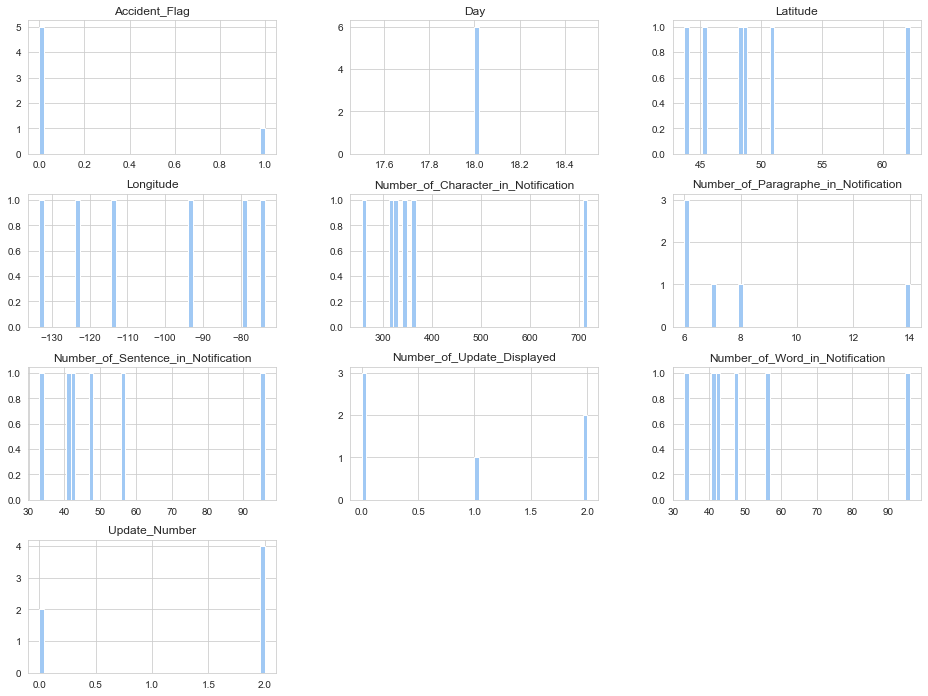

In [349]:
numeric_var = []

for var in dataset.columns:
    if np.dtype(dataset[var]) == int or np.dtype(dataset[var]) == float:
        numeric_var.append(var)

dataset_numeric = dataset[numeric_var]
dataset_numeric.hist(bins=50, figsize=(16,12));        

In [350]:
dataset_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,6.0,18.000000,0.000000,18.000000,18.000000,18.000000,18.000000,18.000000
Longitude,6.0,-102.935476,24.347427,-133.355315,-121.039362,-103.949144,-82.996876,-73.610364
Latitude,6.0,49.915712,6.565408,43.653482,46.229991,48.530305,50.448140,62.229541
Number_of_Update_Displayed,6.0,0.833333,0.983192,0.000000,0.000000,0.500000,1.750000,2.000000
Update_Number,6.0,1.333333,1.032796,0.000000,0.500000,2.000000,2.000000,2.000000
Number_of_Word_in_Notification,6.0,52.666667,22.527021,33.000000,41.500000,45.000000,53.750000,96.000000
Number_of_Paragraphe_in_Notification,6.0,7.833333,3.125167,6.000000,6.000000,6.500000,7.750000,14.000000
Number_of_Character_in_Notification,6.0,388.666667,165.007475,257.000000,320.250000,337.500000,360.750000,717.000000
Number_of_Sentence_in_Notification,6.0,52.666667,22.527021,33.000000,41.500000,45.000000,53.750000,96.000000
Accident_Flag,6.0,0.166667,0.408248,0.000000,0.000000,0.000000,0.000000,1.000000


# Advanced Text Data Cleansing

In [457]:
ii = i-1

dataset_description = pd.DataFrame(columns=['description', 'description_clean_list', 'description_clean'])

for y in range(ii):

    description = ' '.join(dataset['Current_Update'][y][0])
    dataset_description = dataset_description.append({'description': description}, ignore_index=True) 

def cleantext(x):
    
    #removing urls, hashtags and user mentions
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r"#(\w+)", '', x)
    x = re.sub(r"@(\w+)", '', x)
    x = re.sub(r'[^\w\s]', '', x)
    x = re.sub(r'[^\x20-\x7e]',r'', x)

    x = re.sub('[0-9]{5,}', '', x)
    x = re.sub('[0-9]{4}', '', x)
    x = re.sub('[0-9]{3}', '', x)
    x = re.sub('[0-9]{2}',"",x)
    x = re.sub('[0-9]{1}',"",x)
    
    #alpha serial code
    x = re.sub('[A-Z]{2,}',"",x)
    
    #alpha-numeric serial code
    x = re.sub('[ A-Z0-9\.]{2,}',"",x)  
    
    #phone number
    x = re.sub('[0-9 -]{2,}',"",x)
    
    #REMOVE TIME
    x = re.sub(r'\d\d:\d\d',"",x)
    
    #remove dates 
    x = re.sub(r' \d\d \w+ \d\d\d\d ',"",x)
    
    #remove stuff in parenthesis
    x = re.sub('[  \(\.)]{2,}',"",x)
    
    #remove words specific to sitcen notifications
    x = re.sub(r'ET',"",x)
    x = re.sub(r'\b update',"",x)
    x = re.sub(r'\b description of threat/event:',"",x)
    x = re.sub(r'\b description of threat/event',"",x)
    x = re.sub(r'\b new information was received',"",x)    

    #REMOVE EMOJIES
    x = re.compile("["
                    u"\U0001F600-\U0001F64F"
                    u"\U0001F300-\U0001F5FF"
                    u"\U0001F680-\U0001F6FF"
                    u"\U0001F1E0-\U0001F1FF"
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    u"\U0001f926-\U0001f937"
                    u'\U00010000-\U0010ffff'
                    u"\u200d"
                    u"\u2640-\u2642"
                    u"\u2600-\u2B55"
                    u"\u23cf"
                    u"\u23e9"
                    u"\u231a"
                    u"\u3030"
                    u"\ufe0f"
                    "]+", flags=re.UNICODE).sub(r'', x)
   
    #additional emojies cleaning
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    x = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', x)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    x = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', x)
    # Love -- <3, :*
    x = re.sub(r'(<3|:\*)', ' EMO_POS ', x)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    x = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', x)
    # Sad -- :-(, : (, :(, ):, )-:
    x = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', x)
    # Cry -- :,(, :'(, :"(
    x = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', x)

    #additional text cleaning common with tweet that can be useful for notifications
    # Replaces URLs with the word URL
    x = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', x)
    # Replace @handle with the word USER_MENTION
    x = re.sub(r'@[\S]+', 'USER_MENTION', x)
    # Replaces #hashtag with hashtag
    x = re.sub(r'#(\S+)', r' \1 ', x)
    # Remove RT (retweet)
    x = re.sub(r'\brt\b', '', x)
    # Replace 2+ dots with space
    x = re.sub(r'\.{2,}', ' ', x)
    # Strip space, " and ' from tweet
    x = x.strip(' "\'')
    # Replace multiple spaces with a single space
    x = re.sub(r'\s+', ' ', x)
     
    #now that we have been taking care of case sensitive text, we can lower case all text
    x = x.strip().lower()

    x = word_tokenize(x)
    
    #REMOVE ANY STOP WORDS SUCH AS the, of, a, an, for, with, etc.
    stop_words = set(stopwords.words('english'))
    x = [w for w in x if not w in stop_words]
    
    #STEMMING and lemmetizer
    
    #porter = PorterStemmer()
    #x = [porter.stem(word) for word in x]
    
    #sno = nltk.stem.SnowballStemmer('english')
    #x = [sno.stem(word) for word in x]
    
    #lemma = nltk.wordnet.WordNetLemmatizer()
    #x = [lemma.lemmatize(word) for word in x]

    return x

dataset_description['description_clean_list'] = dataset_description['description'].apply(lambda x: cleantext(x))

In [458]:
#comparing clean and original text description
dataset_description

,description,description_clean_list,description_clean
0,Update 02: @ 15:56 01 April 2021 the house a a...,"[updateprilthe, house, accident, car, aircraft...",NaN
1,Description of threat/event: house accident ca...,"[description, threatevent, house, accident, ca...",NaN
2,Description of threat/event: house accident ca...,"[description, threatevent, house, accident, ca...",NaN
3,Description of threat/event: house accident,"[description, threatevent, house, accident]",NaN
4,Update 02: aircraft airport,"[updateaircraft, airport]",NaN
5,Update 02: sdfgsdfsdfsdfgsdfg. 21:54 03 March ...,[updatesdfgsdfsdfsdfgsdfgarch],NaN


In [459]:
#back to string with no list

for y in range(ii):

    dataset_description['description_clean'][y] = ' '.join(dataset_description['description_clean_list'][y]) 

In [460]:
dataset_description

,description,description_clean_list,description_clean
0,Update 02: @ 15:56 01 April 2021 the house a a...,"[updateprilthe, house, accident, car, aircraft...",updateprilthe house accident car aircraft airport
1,Description of threat/event: house accident ca...,"[description, threatevent, house, accident, ca...",description threatevent house accident car air...
2,Description of threat/event: house accident ca...,"[description, threatevent, house, accident, ca...",description threatevent house accident car air...
3,Description of threat/event: house accident,"[description, threatevent, house, accident]",description threatevent house accident
4,Update 02: aircraft airport,"[updateaircraft, airport]",updateaircraft airport
5,Update 02: sdfgsdfsdfsdfgsdfg. 21:54 03 March ...,[updatesdfgsdfsdfsdfgsdfgarch],updatesdfgsdfsdfsdfgsdfgarch


# Visualization & Results Analysis (counter vectorizer + pca + t-sne)

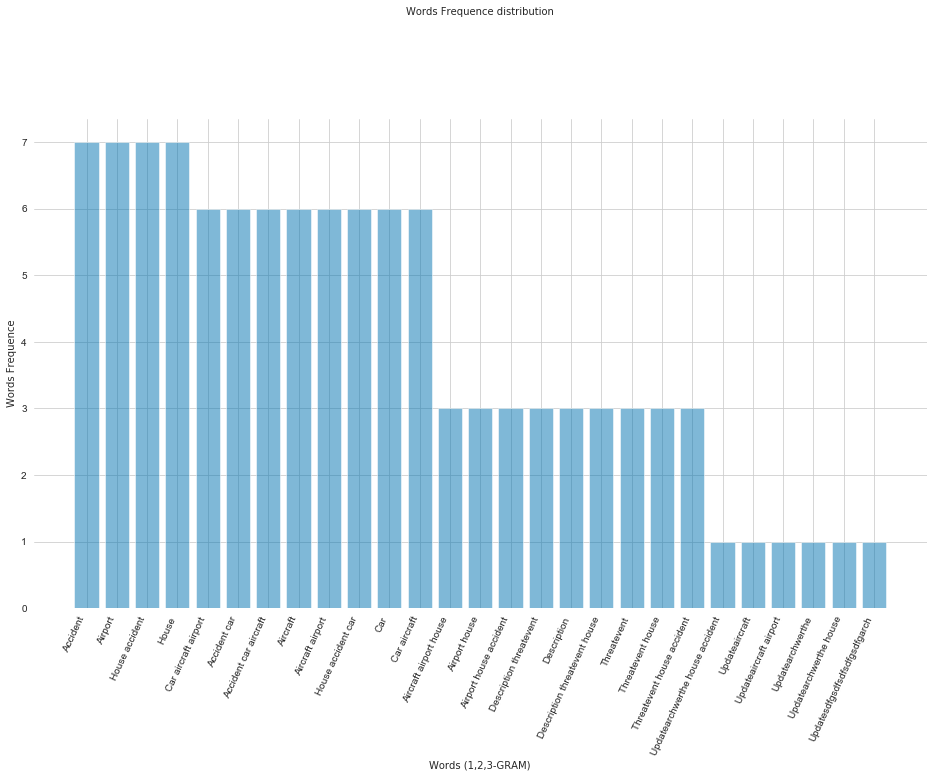

In [74]:
#Data analysis (TOP WORDS BAR CHART with BOW COUNTER)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

dataset_counter = dataset_description["description_clean"]

count = CountVectorizer(ngram_range=(1, 3), stop_words='english')
cleaned_positions = dataset_counter.tolist()
res = count.fit_transform(cleaned_positions)
ress = res.toarray().sum(axis=0)
fnames = pd.DataFrame(list(sorted(zip(count.get_feature_names(), ress))), 
                      columns=["Words", "Words Frequence"]).sort_values(['Words Frequence'])[::-1]

def plot_fnames(fnames, col, index="index"):
    
    FIGSIZE = (16, 9)
    FONT = {"family": "Share Tech Mono", "weight": "normal", "size": 10}
    tds = "#0073b1"
    
    fnames = fnames.reset_index()

    fig, ax = plt.subplots(figsize=FIGSIZE)

    plt.bar(
        x=fnames.index,
        height=fnames[col],
        color=tds,
        alpha=0.5
    )

    plt.title("{} distribution".format(col), fontdict=FONT, y=1.2)
    plt.xticks(
        fnames.index,
        fnames[index].str.capitalize(),
        rotation=65,
        ha="right",
        size=FONT["size"],
    )
    
    plt.ylabel("Words Frequence", fontdict=FONT)
    plt.xlabel("Words (1,2,3-GRAM)", fontdict=FONT)
    plt.yticks()
    ax.set_frame_on(False)
    plt.grid(True)

    plt.show()

plot_fnames(fnames,"Words Frequence","Words")

AttributeError: module 'seaborn' has no attribute 'plt'

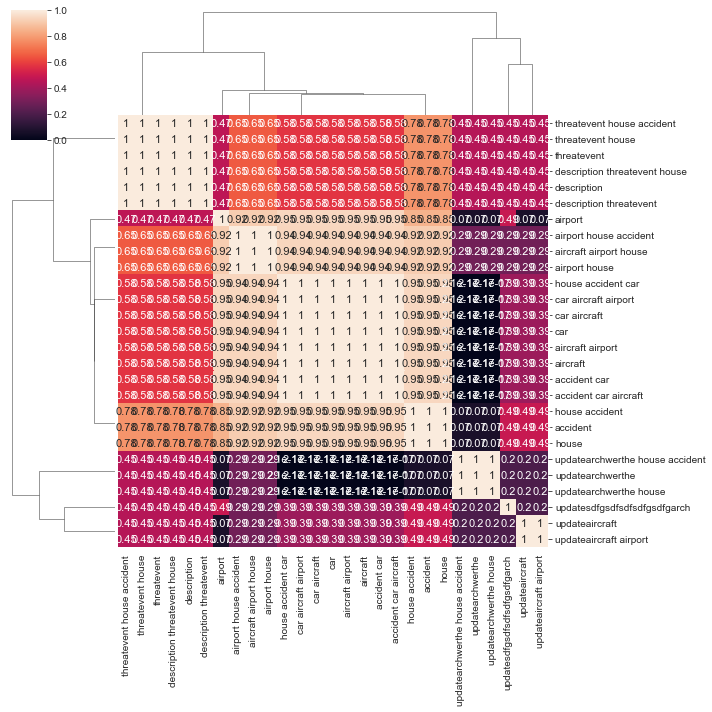

In [80]:
#Data analysis (WORDS CORRELATION)

ttt = DataFrame(data=res.toarray(), columns=count.get_feature_names())

DATA_BINARY = ttt.corr().abs()
map = sns.clustermap(DATA_BINARY, annot = False, annot_kws = {'size': 11})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

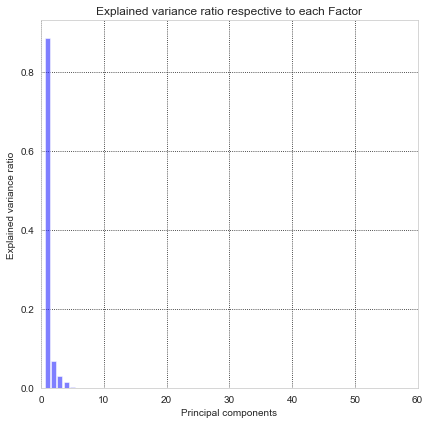

In [81]:
#Data analysis (WORDS PCA, t-SNE & UMAP)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

min_data = min(len(ttt.iloc[:,1]), len(ttt.iloc[1,:]))

#no data standardization due to the binary aspect of all variables

DATA_matrix = ttt.values
PCA = PCA(n_components=min_data)
FACTOR_matrix = PCA.fit_transform(DATA_matrix)
FACTOR_DF_PCA_BI = pd.DataFrame(FACTOR_matrix)
#FACTOR_DF_PCA_BI.head(20)

min_data_plus_one = min_data + 1

plt.figure(figsize = (6, 6))
plt.bar(range(1, min_data_plus_one), PCA.explained_variance_ratio_, alpha=0.5, align='center', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio respective to each Factor')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.xlim([0.0,60])
#plt.ylim([0.00,0.21])
plt.show()

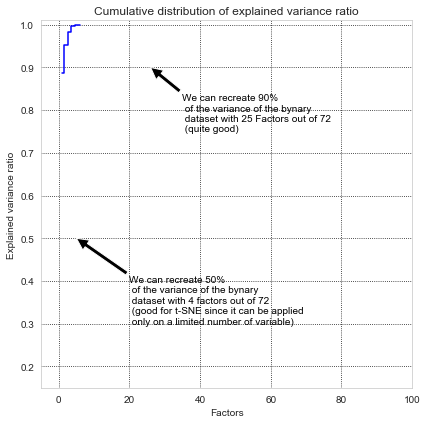

In [82]:
plt.figure(figsize = (6, 6))
plt.step(range(1, min_data_plus_one), np.cumsum(PCA.explained_variance_ratio_), where='mid', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Factors')
plt.title('Cumulative distribution of explained variance ratio')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('We can recreate 90%\n of the variance of the bynary\n dataset with 25 Factors out of 72\n (quite good)', 
xy=(26, 0.90), xytext=(35, 0.75), arrowprops=dict(facecolor='black'), color='black')

plt.annotate('We can recreate 50%\n of the variance of the bynary\n dataset with 4 factors out of 72\n (good for t-SNE since it can be applied\n only on a limited number of variable)', 
xy=(5, 0.5), xytext=(20, 0.30), arrowprops=dict(facecolor='black'), color='black')

plt.xlim([-5,100])
plt.ylim([0.15,1.01])
plt.show()

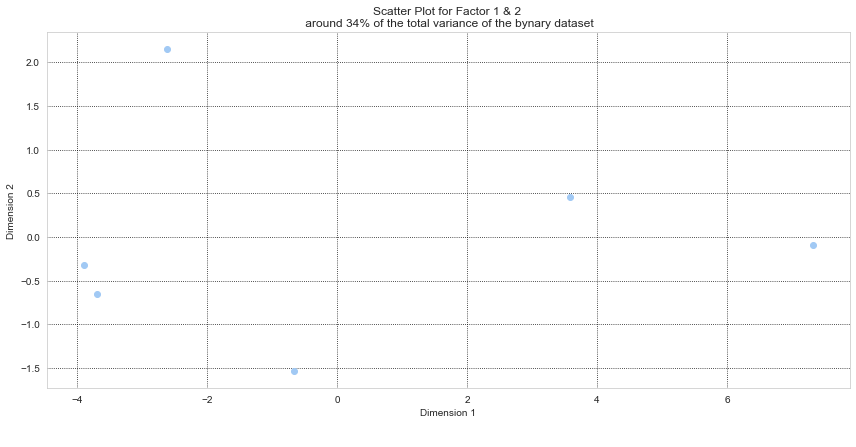

In [78]:
plt.figure(figsize = (12, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

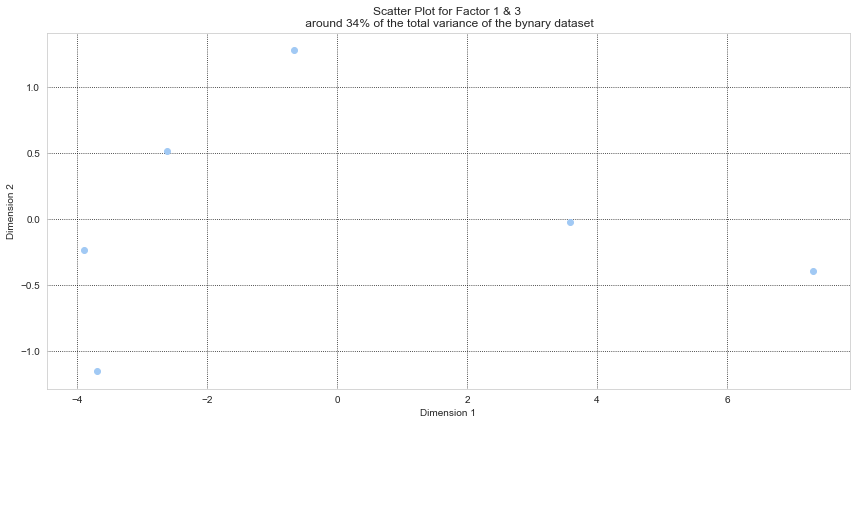

In [60]:
plt.figure(figsize = (12, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 3 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

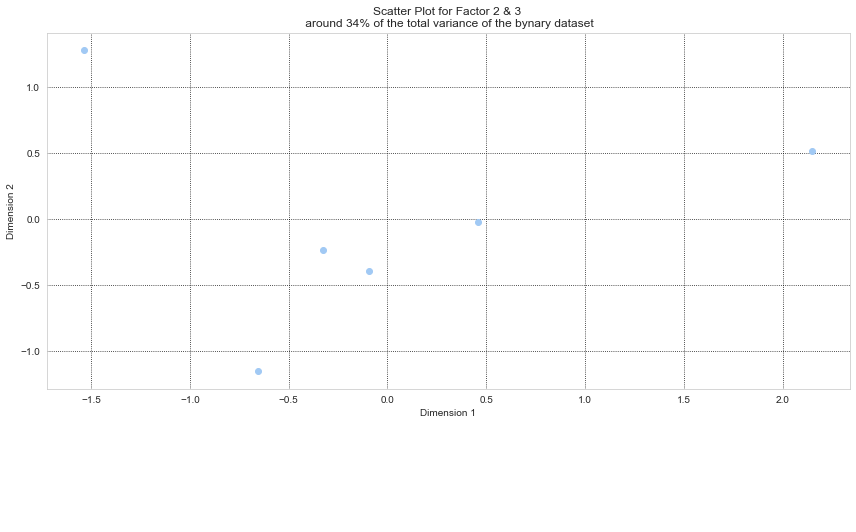

In [62]:
plt.figure(figsize = (12, 6))
plt.scatter(FACTOR_DF_PCA_BI[1],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 2 & 3 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

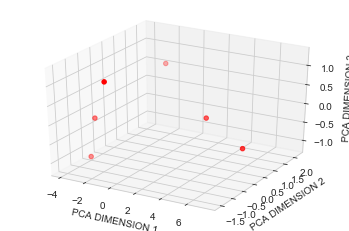

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = FACTOR_DF_PCA_BI[0]
y = FACTOR_DF_PCA_BI[1]
z = FACTOR_DF_PCA_BI[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PCA DIMENSION 1')
ax.set_ylabel('PCA DIMENSION 2')
ax.set_zlabel('PCA DIMENSION 3')

plt.show()

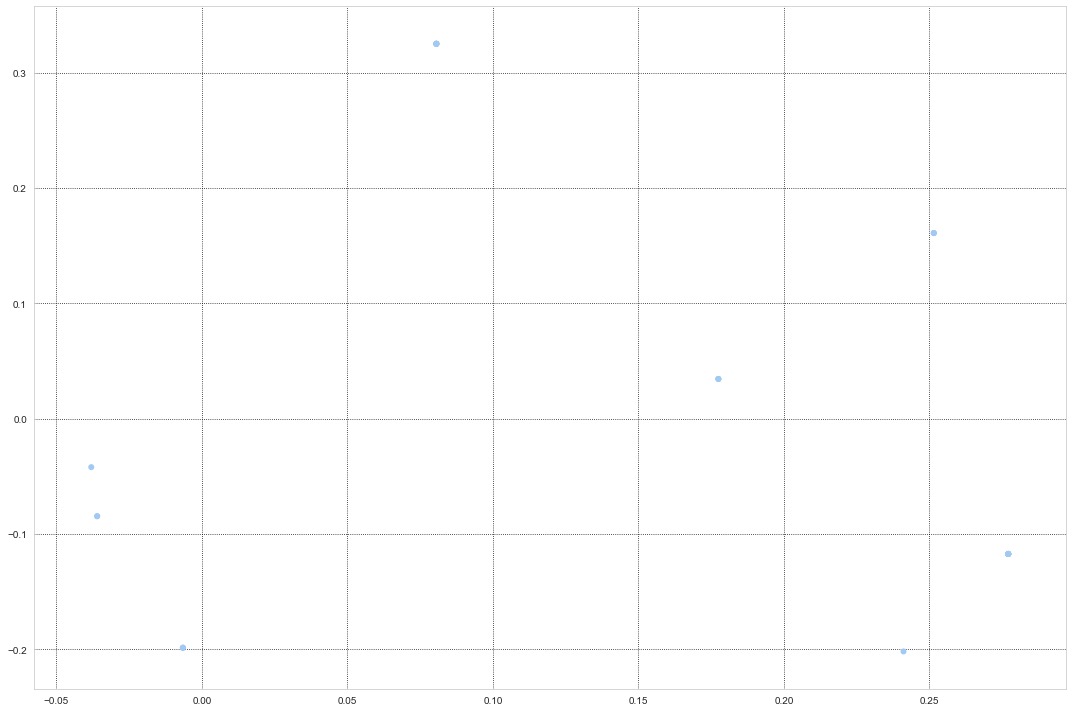

In [83]:
#PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.show();

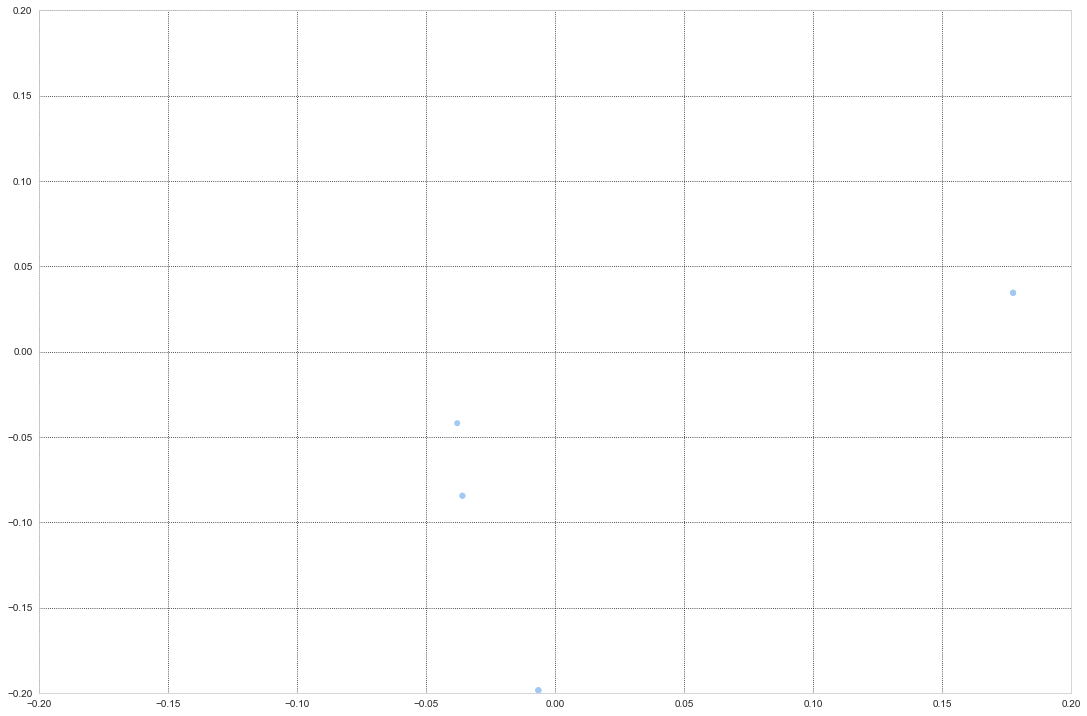

In [65]:
# PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH (Zooming)
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
plt.show();

C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


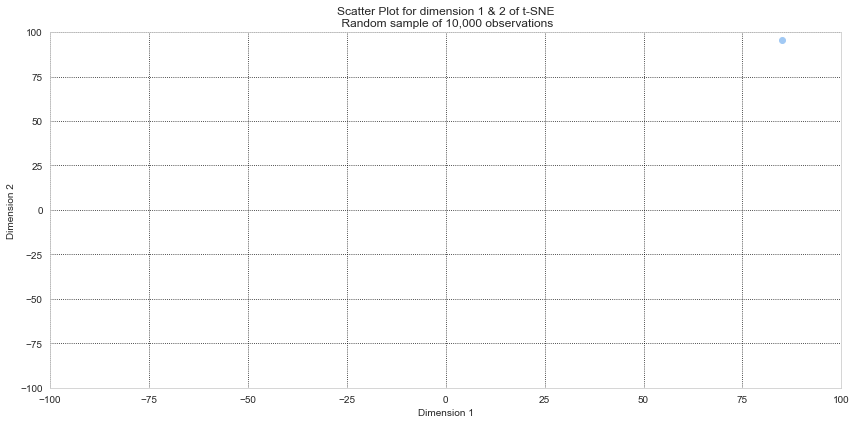


Total Estimation Running Time:
0.37709729999960473 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [84]:
start_time = time.clock()

tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(ttt)
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ["TSNE_1", "TSNE_2", "TSNE_3"]

plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_1'],X_tsne['TSNE_2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

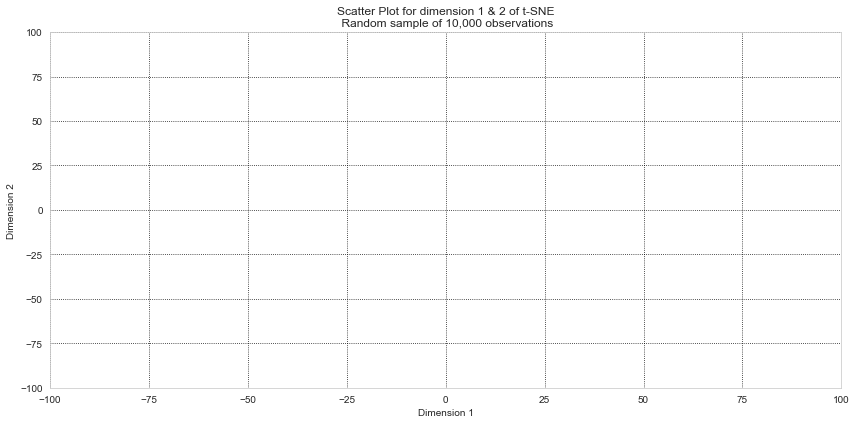


Total Estimation Running Time:
7.4714146000001165 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [67]:
plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_1'],X_tsne['TSNE_3'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

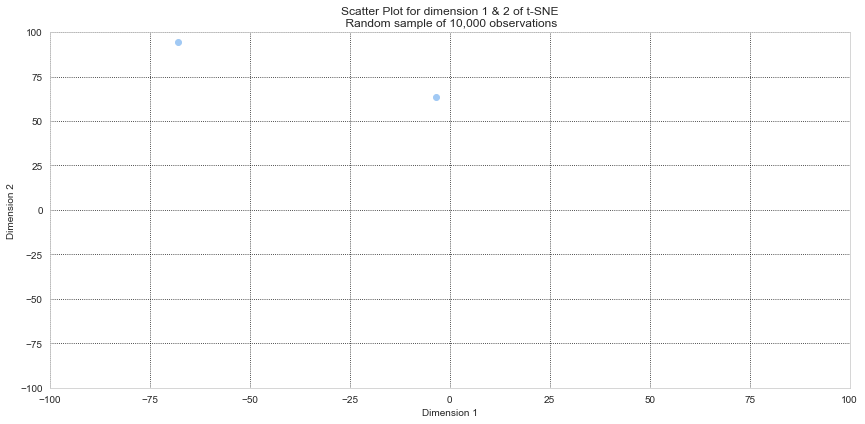


Total Estimation Running Time:
11.442303999999922 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [68]:
plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_2'],X_tsne['TSNE_3'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

# Visualization & Results Analysis (tf-idf + pca + t-sne)

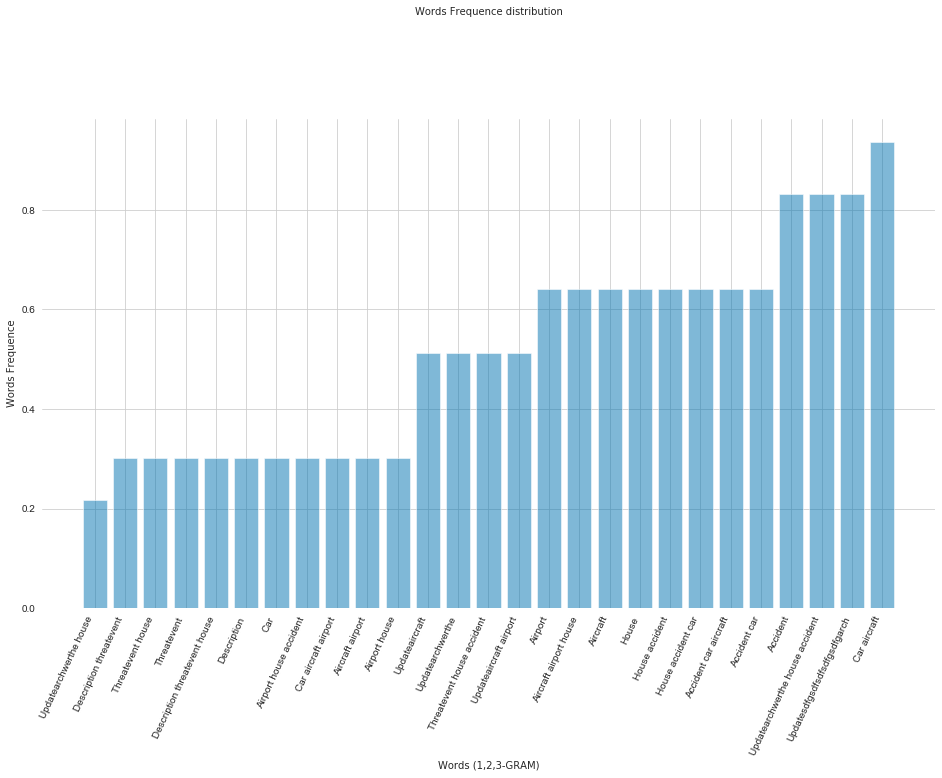

In [100]:
#tf-idf

dataset_tfidf = dataset_description["description_clean"]

tfidf = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
cleaned_positions = dataset_tfidf.tolist()
res = tfidf.fit_transform(cleaned_positions)
ress = res.toarray().sum(axis=0)
fnames = pd.DataFrame(list(sorted(zip(count.get_feature_names(), ress))), 
                      columns=["Words", "Words Frequence"]).sort_values(['Words Frequence'])#[::-1]

plot_fnames(fnames,"Words Frequence","Words")

AttributeError: module 'seaborn' has no attribute 'plt'

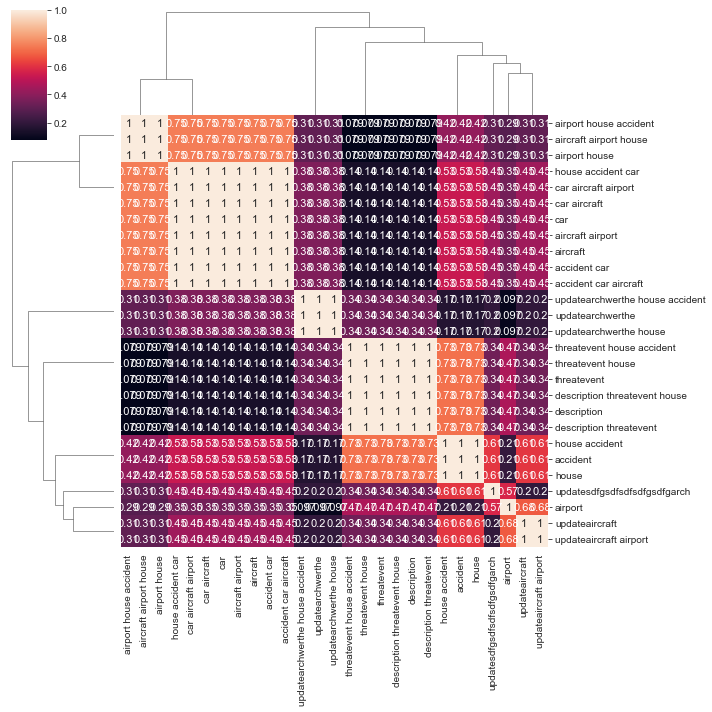

In [86]:
#Data analysis (WORDS CORRELATION)

ttt = DataFrame(data=res.toarray(), columns=tfidf.get_feature_names())

DATA_BINARY = ttt.corr().abs()
map = sns.clustermap(DATA_BINARY, annot = False, annot_kws = {'size': 11})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

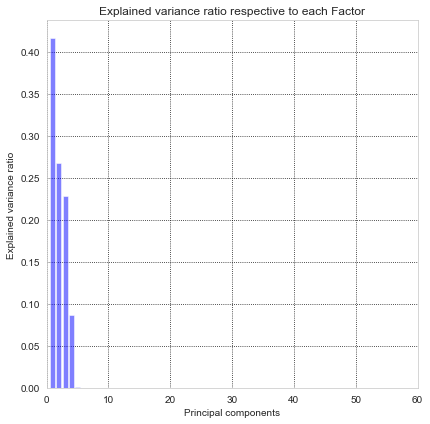

In [88]:
#Data analysis (WORDS PCA, t-SNE & UMAP)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

min_data = min(len(ttt.iloc[:,1]), len(ttt.iloc[1,:]))

#no data standardization due to the binary aspect of all variables

DATA_matrix = ttt.values
PCA = PCA(n_components=min_data)
FACTOR_matrix = PCA.fit_transform(DATA_matrix)
FACTOR_DF_PCA_BI = pd.DataFrame(FACTOR_matrix)
#FACTOR_DF_PCA_BI.head(20)

min_data_plus_one = min_data + 1

plt.figure(figsize = (6, 6))
plt.bar(range(1, min_data_plus_one), PCA.explained_variance_ratio_, alpha=0.5, align='center', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio respective to each Factor')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.xlim([0.0,60])
#plt.ylim([0.00,0.21])
plt.show()

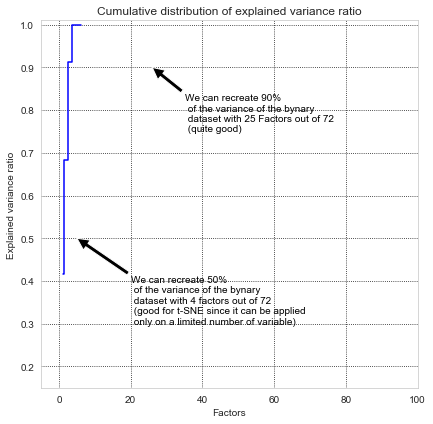

In [89]:
plt.figure(figsize = (6, 6))
plt.step(range(1, min_data_plus_one), np.cumsum(PCA.explained_variance_ratio_), where='mid', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Factors')
plt.title('Cumulative distribution of explained variance ratio')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('We can recreate 90%\n of the variance of the bynary\n dataset with 25 Factors out of 72\n (quite good)', 
xy=(26, 0.90), xytext=(35, 0.75), arrowprops=dict(facecolor='black'), color='black')

plt.annotate('We can recreate 50%\n of the variance of the bynary\n dataset with 4 factors out of 72\n (good for t-SNE since it can be applied\n only on a limited number of variable)', 
xy=(5, 0.5), xytext=(20, 0.30), arrowprops=dict(facecolor='black'), color='black')

plt.xlim([-5,100])
plt.ylim([0.15,1.01])
plt.show()

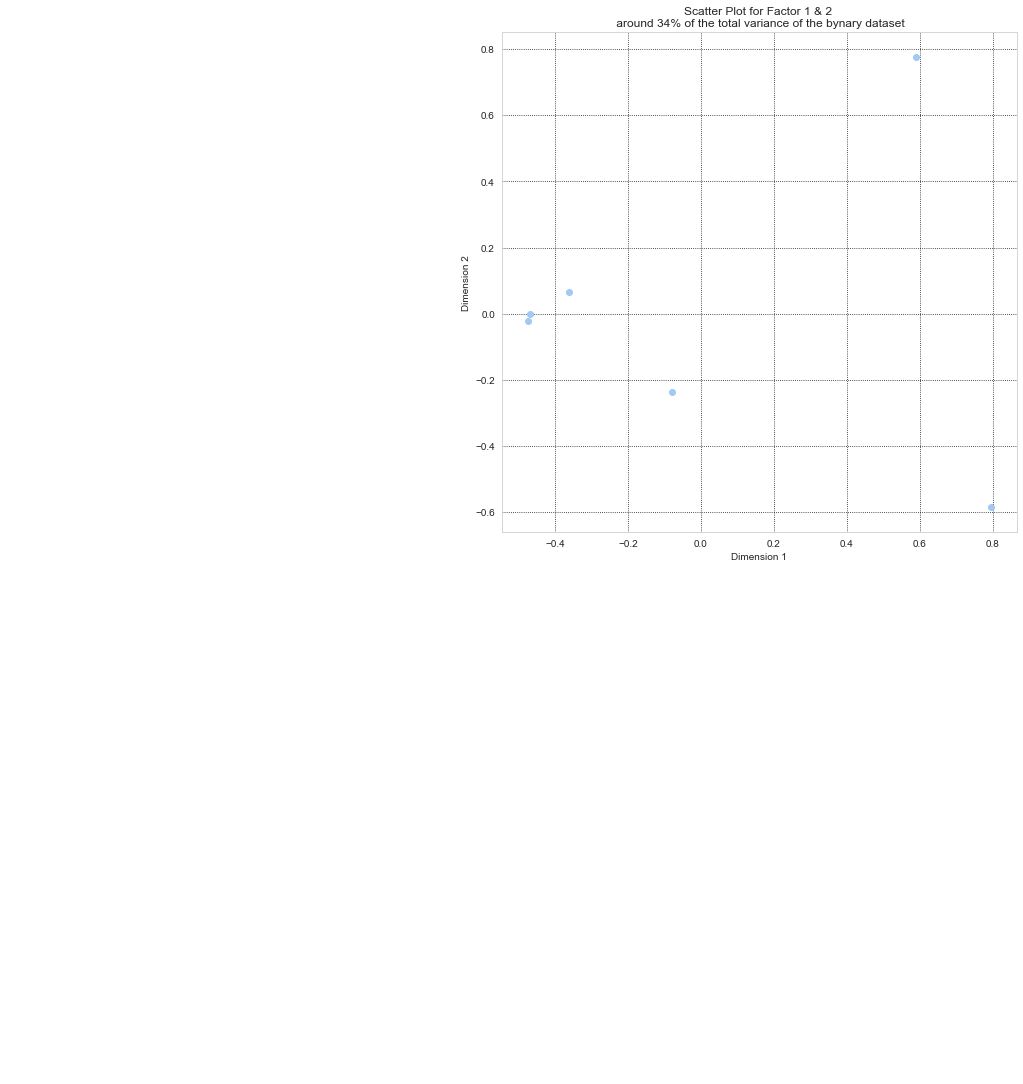

In [96]:
plt.figure(figsize = (8, 8))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

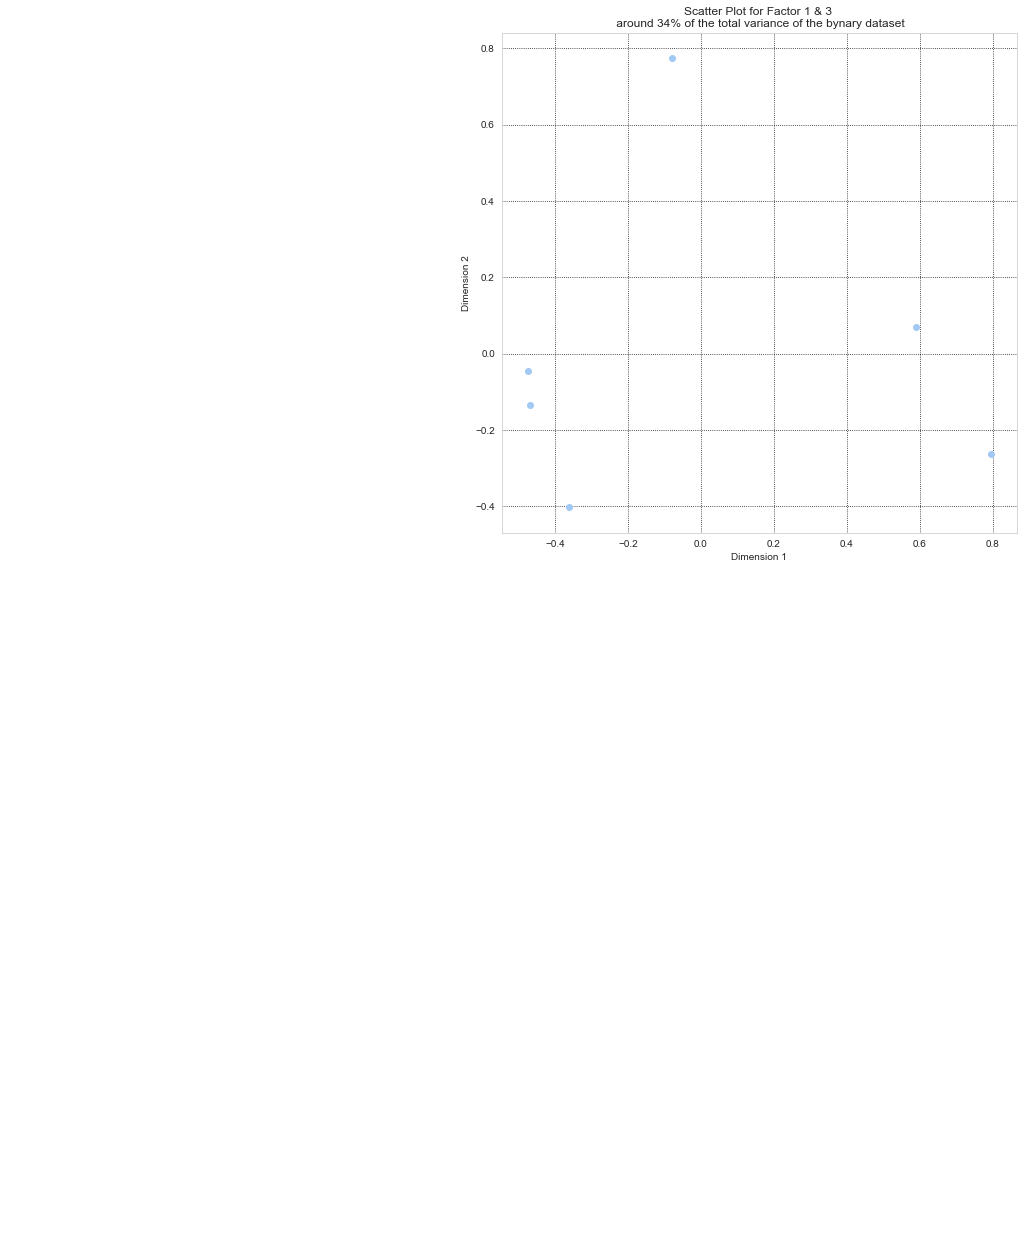

In [97]:
plt.figure(figsize = (8, 8))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 3 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

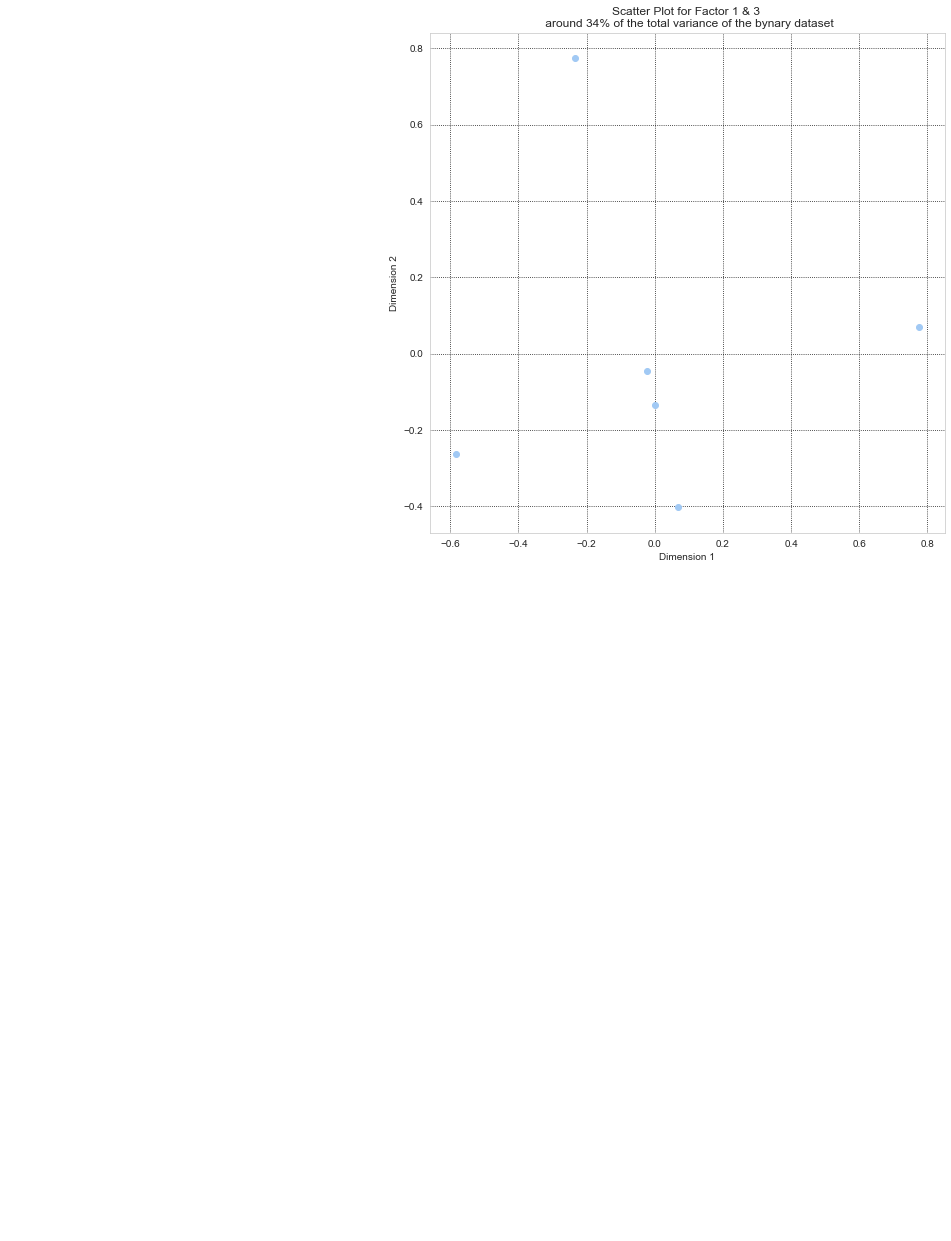

In [98]:
plt.figure(figsize = (8, 8))
plt.scatter(FACTOR_DF_PCA_BI[1],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 3 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

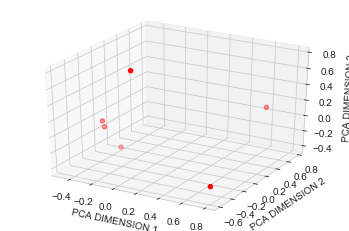

In [101]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = FACTOR_DF_PCA_BI[0]
y = FACTOR_DF_PCA_BI[1]
z = FACTOR_DF_PCA_BI[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PCA DIMENSION 1')
ax.set_ylabel('PCA DIMENSION 2')
ax.set_zlabel('PCA DIMENSION 3')

plt.show()

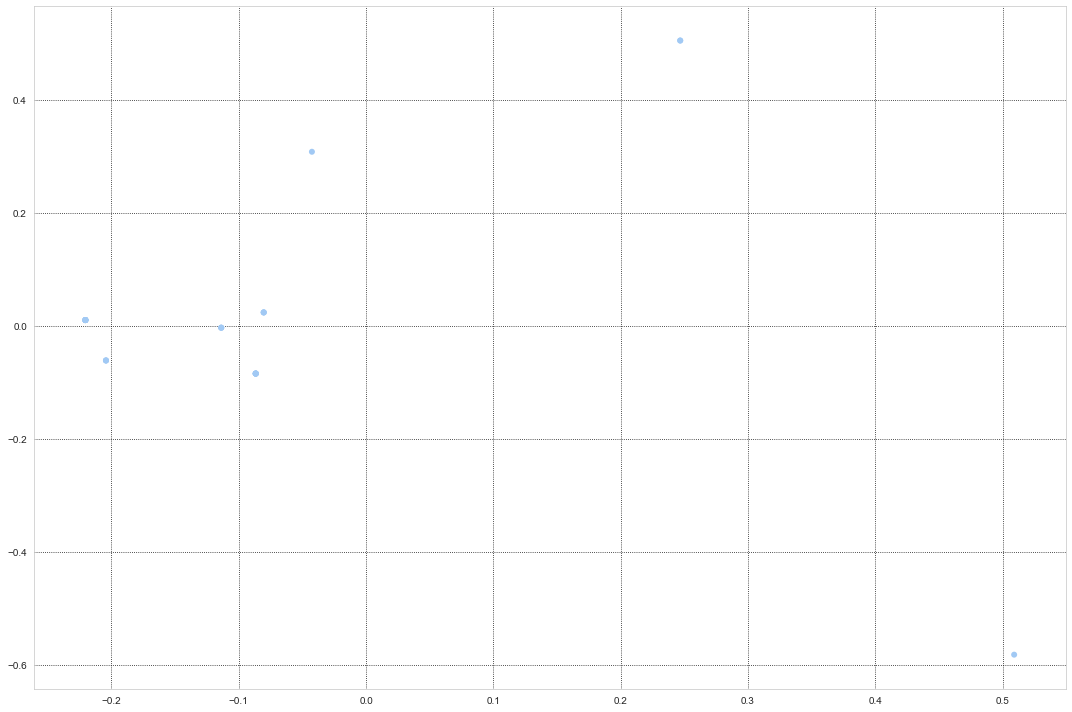

In [102]:
#PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.show();

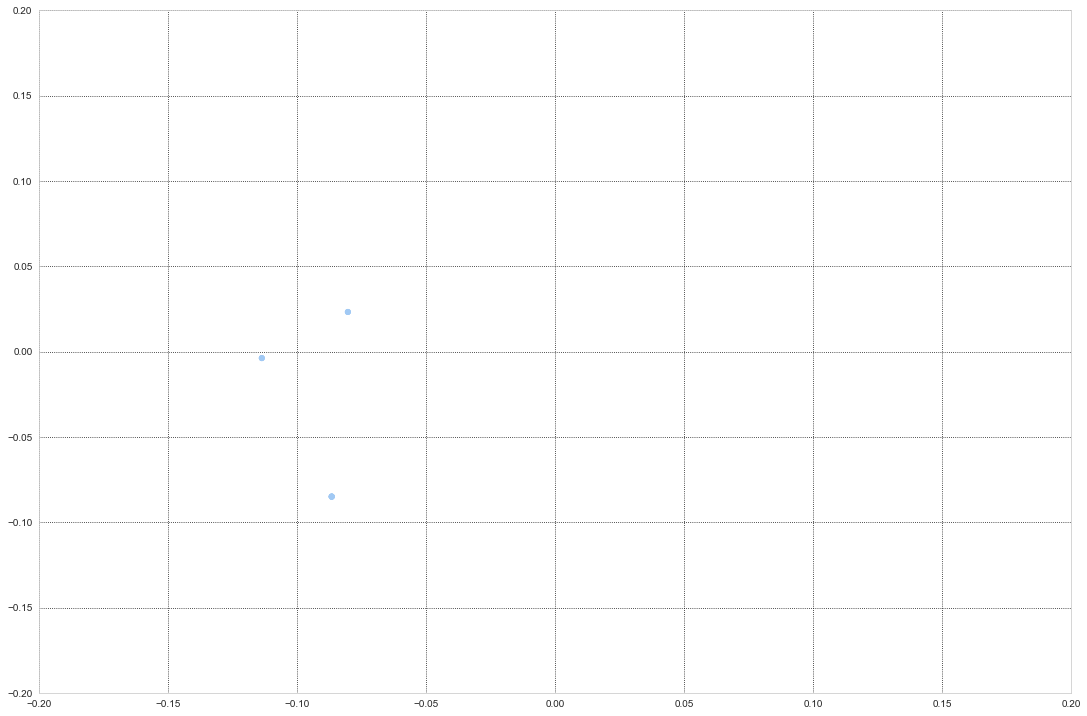

In [103]:
# PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH (Zooming)
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
plt.show();

C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


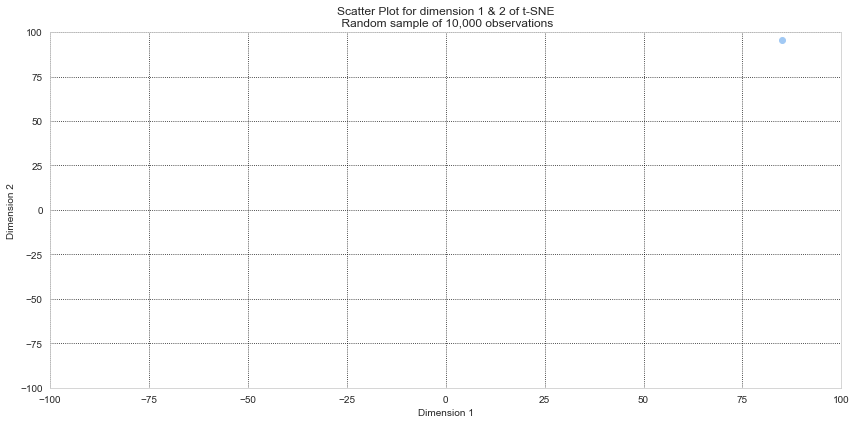


Total Estimation Running Time:
0.3995866000004753 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [104]:
start_time = time.clock()

tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(ttt)
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ["TSNE_1", "TSNE_2", "TSNE_3"]

plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_1'],X_tsne['TSNE_2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


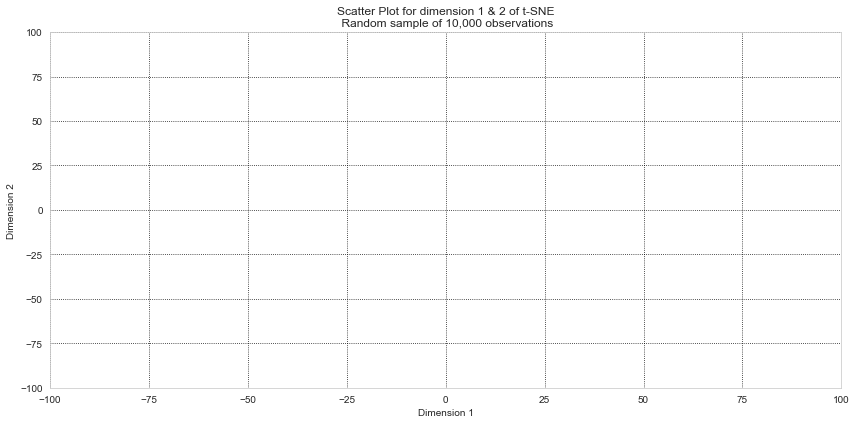


Total Estimation Running Time:
0.38475560000006226 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [105]:
start_time = time.clock()

tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(ttt)
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ["TSNE_1", "TSNE_2", "TSNE_3"]

plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_1'],X_tsne['TSNE_3'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


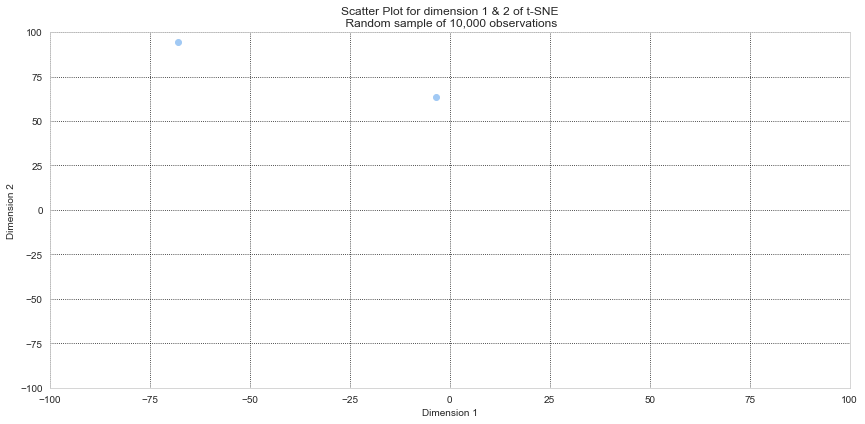


Total Estimation Running Time:
0.3674485999999888 Seconds


C:\Users\18195\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [106]:
start_time = time.clock()

tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(ttt)
X_tsne = pd.DataFrame(X_tsne)
X_tsne.columns = ["TSNE_1", "TSNE_2", "TSNE_3"]

plt.figure(figsize = (12, 6))
plt.scatter(X_tsne['TSNE_2'],X_tsne['TSNE_3'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for dimension 1 & 2 of t-SNE\n Random sample of 10,000 observations')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
#plt.annotate('2 cluster can be observed and we did not even use t-SNE yet', 
#xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')
plt.ylim([-100,100])
plt.xlim([-100,100])
plt.show();

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

In [ ]:
#Data analysis (WORD EMBEDDING WITH GLOVE AND WORD2VEC)

from gensim.models import word2vec

In [ ]:
#Transformer's Models (BERT & GPT-2)